# PARCIAL 2
## Laura Jimena Tinjacá Lara
### Se realizará un trabajo de clasificación con la base de datos de matemáticas.

# PUNTO 1: 
### Realice el proceso de verificación de calidad de datos y limpieza si es necesario realizarla. Mencione al final del punto, un resumen de los hallazgos encontrados.

In [704]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [705]:
data = pd.read_csv('/content/drive/MyDrive/student-mat.csv', 
                 sep = ';',
                 thousands=',', decimal='.',
                 skip_blank_lines=True,
                 low_memory = False,
                 dtype={
                     'Nit Entidad': str
                 })
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4.00,3,4,1,1,3.00,6.00,5.00,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5.00,3,3,1,1,3.00,4.00,5.00,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4.00,3,2,2,3,3.00,10.00,7.00,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3.00,2,2,1,1,5.00,2.00,15.00,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4.00,3,2,1,2,5.00,4.00,6.00,10,10


* Dimensiones de los datos:

In [706]:
print('MATEMÁTICAS')
print('Filas: ', data.shape[0])
print('Columnas: ', data.shape[1])

MATEMÁTICAS
Filas:  395
Columnas:  33


* Atributos y tipo de atributos:

In [707]:
data.dtypes

school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health        float64
absences      float64
G1            float64
G2              int64
G3              int64
dtype: object

Se observa el tipo de variables que hay en la base teniendo en cuenta que hay algunas clasificadas como cuantitativas pero que hacen referencia a una variable categórica.

* Datos faltantes:

In [708]:
for col in data.columns:
    num_missing = data[col].isnull().sum()
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

school - 0.0% - 0
sex - 0.25% - 1
age - 0.0% - 0
address - 0.51% - 2
famsize - 0.25% - 1
Pstatus - 0.0% - 0
Medu - 0.0% - 0
Fedu - 0.0% - 0
Mjob - 0.25% - 1
Fjob - 0.0% - 0
reason - 0.25% - 1
guardian - 0.0% - 0
traveltime - 0.0% - 0
studytime - 0.0% - 0
failures - 0.0% - 0
schoolsup - 0.25% - 1
famsup - 0.0% - 0
paid - 0.51% - 2
activities - 0.51% - 2
nursery - 0.0% - 0
higher - 0.25% - 1
internet - 0.0% - 0
romantic - 0.0% - 0
famrel - 0.25% - 1
freetime - 0.0% - 0
goout - 0.0% - 0
Dalc - 0.0% - 0
Walc - 0.0% - 0
health - 0.25% - 1
absences - 0.25% - 1
G1 - 0.25% - 1
G2 - 0.0% - 0
G3 - 0.0% - 0


Se puede observar que para las variables sexo hay un dato faltante, lo que representa un 0.25% de faltantes para el total de datos.

In [709]:
data[data["sex"].isnull() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
225,GP,NaN,18,R,GT3,T,3,1,other,other,reputation,mother,1,2,1,no,no,no,yes,yes,yes,yes,yes,5.00,3,3,1,1,4.00,16.00,9.00,8,7


Se puede observar que para la variable famsize (número de integrantes de la familia) hay un dato faltante, lo que representa un 0.25% de faltantes para el total de datos.

In [710]:
data[data["famsize"].isnull() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
259,GP,F,17,U,NaN,T,2,2,services,services,course,father,1,4,0,no,no,yes,yes,yes,yes,yes,yes,3.00,4,1,1,1,2.00,0.00,10.00,9,0


Se puede observar que para la variable Mjob (Trabajo de la mamá) hay un dato faltante, lo que representa un 0.25% de faltantes para el total de datos.

In [711]:
data[data["Mjob"].isnull() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
168,GP,F,16,U,GT3,T,2,2,NaN,other,home,mother,1,2,0,no,yes,yes,no,no,yes,yes,no,5.00,1,5,1,1,4.00,0.00,6.00,7,0


Se puede observar que para la variable reason (Razón para elegir ese colegio) 
hay un dato faltante, lo que representa un 0.25% de faltantes para el total de datos.

In [712]:
data[data["reason"].isnull() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
301,GP,M,17,U,LE3,T,4,4,other,teacher,NaN,father,2,1,0,no,no,yes,no,yes,yes,yes,no,4.00,1,1,2,2,5.00,0.00,11.00,11,10


Se puede observar que para la variable higher (Si quiere recibir educación superior o no) hay un dato faltante, lo que representa un 0.25% de faltantes para el total de datos.

In [713]:
data[data["higher"].isnull() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
368,MS,F,18,U,GT3,T,2,3,at_home,services,course,father,2,1,0,no,yes,yes,no,yes,NaN,yes,yes,5.00,2,3,1,2,4.00,0.00,11.00,10,10


Se puede observar que para la variable famrel (Calidad de la relación con su familia) hay un dato faltante, lo que representa un 0.25% de faltantes para el total de datos.

In [714]:
data[data["famrel"].isnull() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
381,MS,M,18,R,GT3,T,2,1,other,other,other,mother,2,1,0,no,no,no,yes,no,yes,yes,yes,NaN,4,3,1,3,5.00,5.00,7.00,6,7


Se puede observar que para la variable health (Calidad de la salud) hay un dato faltante, lo que representa un 0.25% de faltantes para el total de datos.

In [715]:
data[data["health"].isnull() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
344,GP,F,18,U,GT3,T,2,3,at_home,other,course,mother,1,3,0,no,yes,no,no,yes,yes,yes,no,4.00,3,3,1,2,NaN,4.00,11.00,10,10


Se puede observar que para la variable absences(Número de faltas) hay un dato faltante, lo que representa un 0.25% de faltantes para el total de datos.

In [716]:
data[data["absences"].isnull() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
253,GP,M,16,R,GT3,T,2,1,other,other,course,mother,2,1,0,no,no,no,yes,no,yes,no,no,3.00,3,2,1,3,3.00,NaN,8.00,9,8


Se puede observar que para la variable G1 (Nota de matemáticas para el primer periodo) hay un dato faltante, lo que representa un 0.25% de faltantes para el total de datos.

In [717]:
data[data["G1"].isnull() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
377,MS,F,18,R,LE3,T,4,4,teacher,services,course,mother,1,2,0,no,no,yes,yes,yes,yes,yes,no,5.00,4,3,3,4,2.00,4.00,NaN,9,10


Se puede observar que para la variable address (Si el estudiante vive en zona urbana o rural) se encontraron 2 datos faltantes, lo que representa un faltante del 0.51%.

In [718]:
data[data["address"].isnull() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
9,GP,M,15,NaN,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5.00,5,1,1,1,5.00,0.00,14.00,15,15
379,MS,F,17,NaN,GT3,T,3,1,at_home,other,reputation,mother,1,2,0,no,yes,yes,yes,no,yes,yes,no,4.00,5,4,2,3,1.00,17.00,10.00,10,10


Se puede observar que para la variable paid (Pagan o no clases adicionales para entender matemáticas) se encontraron 2 datos faltantes, lo que representa un faltante del 0.51% en cada variable.

In [719]:
data[data["paid"].isnull() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
201,GP,F,16,U,GT3,T,2,3,other,other,reputation,mother,1,2,0,yes,yes,NaN,yes,yes,yes,no,no,4.00,4,3,1,3,4.00,6.00,8.00,10,10
268,GP,M,18,U,GT3,T,4,2,health,other,reputation,father,1,2,0,no,yes,NaN,yes,yes,yes,yes,yes,5.00,4,5,1,3,5.00,10.00,10.00,9,10


Se puede observar que para la variable activities (Si realizan o no actividades extracurriculares) se encontraron 2 datos faltantes, lo que representa un faltante del 0.51% en cada variable.

In [720]:
data[data["activities"].isnull() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
121,GP,M,15,U,GT3,T,2,2,services,services,home,father,1,4,0,no,yes,yes,NaN,yes,yes,yes,no,5.00,5,4,1,2,5.00,6.00,16.00,14,15
389,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,NaN,yes,yes,no,no,1.00,1,1,1,1,5.00,0.00,6.00,5,0


* Selección de variables: Como se va a realizar un modelo por clasificación, se van a eliminar las variables cuantitativas.

In [721]:
columns = ['school','sex','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime',
           'studytime','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic',
           'famrel','freetime','goout','Dalc','Walc','health','G3']
data0 = data.copy()
data0 = data0[columns]
data0

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G3
0,GP,F,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,yes,no,no,no,yes,yes,no,no,4.00,3,4,1,1,3.00,6
1,GP,F,U,GT3,T,1,1,at_home,other,course,father,1,2,no,yes,no,no,no,yes,yes,no,5.00,3,3,1,1,3.00,6
2,GP,F,U,LE3,T,1,1,at_home,other,other,mother,1,2,yes,no,yes,no,yes,yes,yes,no,4.00,3,2,2,3,3.00,10
3,GP,F,U,GT3,T,4,2,health,services,home,mother,1,3,no,yes,yes,yes,yes,yes,yes,yes,3.00,2,2,1,1,5.00,15
4,GP,F,U,GT3,T,3,3,other,other,home,father,1,2,no,yes,yes,no,yes,yes,no,no,4.00,3,2,1,2,5.00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,2,2,services,services,course,other,1,2,no,yes,yes,no,yes,yes,no,no,5.00,5,4,4,5,4.00,9
391,MS,M,U,LE3,T,3,1,services,services,course,mother,2,1,no,no,no,no,no,yes,yes,no,2.00,4,5,3,4,2.00,16
392,MS,M,R,GT3,T,1,1,other,other,course,other,1,1,no,no,no,no,no,yes,no,no,5.00,5,3,3,3,3.00,7
393,MS,M,R,LE3,T,3,2,services,other,course,mother,3,1,no,no,no,no,no,yes,yes,no,4.00,4,1,3,4,5.00,10


In [722]:
print('Antes de borrar registros: ', data0.shape)
for col in data0.columns:
    missing = data0[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        data0['{}_ismissing'.format(col)] = missing
ismissing_cols = [col for col in data0.columns if 'ismissing' in col]
data0['num_missing'] = data0[ismissing_cols].sum(axis=1)
data0[data0.num_missing >= 1]
ind_missing = data0[data0['num_missing'] >= 1].index
df_less_missing_rows = data0.drop(ind_missing, axis=0)
df_less_missing_rows = df_less_missing_rows[columns]
print('Después de borrar registros: ',df_less_missing_rows.shape)

Antes de borrar registros:  (395, 28)
Después de borrar registros:  (381, 28)


In [723]:
data0.describe()

,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,G3,num_missing
count,395.00,395.00,395.00,395.00,394.00,395.00,395.00,395.00,395.00,394.00,395.00,395.00
mean,2.75,2.52,1.45,2.04,3.94,3.24,3.11,1.48,2.29,3.56,10.44,0.04
std,1.09,1.09,0.70,0.84,0.90,1.00,1.11,0.89,1.29,1.39,4.63,0.19
min,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00
25%,2.00,2.00,1.00,1.00,4.00,3.00,2.00,1.00,1.00,3.00,8.00,0.00
50%,3.00,2.00,1.00,2.00,4.00,3.00,3.00,1.00,2.00,4.00,11.00,0.00
75%,4.00,3.00,2.00,2.00,5.00,4.00,4.00,2.00,3.00,5.00,14.00,0.00
max,4.00,4.00,4.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,24.00,1.00


In [724]:
df_less_missing_rows.describe()

,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,G3
count,381.00,381.00,381.00,381.00,381.00,381.00,381.00,381.00,381.00,381.00,381.00
mean,2.76,2.53,1.45,2.03,3.94,3.23,3.12,1.49,2.31,3.54,10.52
std,1.10,1.09,0.70,0.84,0.89,0.98,1.10,0.90,1.30,1.39,4.60
min,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,2.00,2.00,1.00,1.00,4.00,3.00,2.00,1.00,1.00,3.00,8.00
50%,3.00,3.00,1.00,2.00,4.00,3.00,3.00,1.00,2.00,4.00,11.00
75%,4.00,3.00,2.00,2.00,5.00,4.00,4.00,2.00,3.00,5.00,14.00
max,4.00,4.00,4.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,24.00


Se observa que hay 14 individuos con al menos un dato faltante, lo que representa un 3,5443% del total. <BR> Ahora bien, teniendo en cuenta que es un porcentaje bajo, que hay muchas variables explicativas y que, como se observa en las tablas, los promedios de la base completa y de la base imputada no son muy diferentes, se decide eliminar a los 14 individuos. Además, también se observa que las medidas descriptivas como los quantiles, mínimo y máximo no cambian en absoluto teniendo o no en cuenta a estos individuos.

* Datos duplicados:

In [725]:
data_imp = df_less_missing_rows
data_imp[data_imp.duplicated()]

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G3


No hay datos duplicados en la base.

* Consistencia de los datos: 

1. School:

In [726]:
data_imp['school'].value_counts()

GP    339
MS     42
Name: school, dtype: int64

De los 381 estudiantes, 339 estudian en el colegio Gabriel Pereira y 42 estudian en el colegio Mousinho da Silveira.

2. Sex:

In [727]:
data_imp['sex'].value_counts()

F    200
M    180
B      1
Name: sex, dtype: int64

In [728]:
data_imp[data_imp["sex"] == 'B']

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G3
295,GP,B,U,GT3,T,3,3,health,other,home,mother,1,1,no,yes,yes,no,yes,yes,yes,no,4.00,4,3,1,3,5.00,11


De los 381 estudiantes, 200 son mujeres y 180 son hombres. <BR> Hay un individuo que tiene definido el sexo como B, al revisar el diccionario se observa que no hay una categoría con esa etiqueta, por lo que se podría pensar que es un dato mal etiquetado.

3. Address:

In [729]:
data_imp['address'].value_counts()

U    296
R     85
Name: address, dtype: int64

De los 381 estudiantes, 296 viven en zona urbana y 85 viven en zona rural.

4. Famsize:

In [730]:
data_imp['famsize'].value_counts()

GT3    269
LE3    112
Name: famsize, dtype: int64

De los 381 estudiantes, 269 tienen una familia conformada por más de tres integrantes y 112 tienen una familia conformada por 3 o menos miembros.

5. Pstatus:

In [731]:
data_imp['Pstatus'].value_counts()

T    339
A     41
Z      1
Name: Pstatus, dtype: int64

In [732]:
data_imp[data_imp["Pstatus"] == 'Z']

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G3
317,GP,F,U,GT3,Z,4,3,other,other,course,mother,1,3,no,yes,yes,yes,yes,yes,yes,yes,4.00,3,4,1,1,5.00,9


De los 381 estudiantes, 339 tienen padres que viven juntos y 41 tienen padres que están separados. <BR> Hay un dato que no corresponde a ninguna categoría, podría estar mal etiquetado.

6. Medu:

In [733]:
data_imp['Medu'].value_counts()

4    129
3     96
2     95
1     58
0      3
Name: Medu, dtype: int64

De los 381 estudiantes, 3 tienen madres que no tienen ningún tipo de nivel educativo, 58 tienen madres que tienen un nivel educativo hasta 4to de primaria y 95 tienen madres que tienen un nivel educativo entre 5to y 9no de primaria. <BR> Además, 96 tienen madres que tienen un nivel educativo hasta secundaria y 129 tienen madres que tienen un nivel educativo de educación superior.

7. Fedu:

In [734]:
data_imp['Fedu'].value_counts()

2    110
3     97
4     94
1     78
0      2
Name: Fedu, dtype: int64

De los 381 estudiantes, 2 tienen padres que no tienen ningún tipo de nivel educativo, 78 tienen padres que tienen un nivel educativo hasta 4to de primaria y 110 tienen padres que tienen un nivel educativo entre 5to y 9no de primaria. <BR> Además, 97 tienen padres que tienen un nivel educativo hasta secundaria y 94 tienen padres que tienen un nivel educativo de educación superior.

8. Mjob:

In [735]:
data_imp['Mjob'].value_counts()

other       134
services    100
teacher      58
at_home      56
health       33
Name: Mjob, dtype: int64

De los 381 estudiantes, 100 madres trabajan en servicios civiles, 58 son profesoras, 56 trabajan en la casa, 33 trabajan en el sector de la salud y 134 madres se dedican a otros trabajos.

9. Fjob:

In [736]:
data_imp['Fjob'].value_counts()

other       207
services    108
teacher      28
at_home      20
health       18
Name: Fjob, dtype: int64

De los 381 estudiantes, 108 padres trabajan en servicios civiles, 28 son profesores, 20 trabajan en la casa, 18 trabajan en el sector de la salud y 207 padres se dedican a otros trabajos.

10. Reason:

In [737]:
data_imp['reason'].value_counts()

course        141
home          105
reputation     99
other          35
Reputation      1
Name: reason, dtype: int64

In [738]:
data_imp[data_imp["reason"] == 'Reputation']

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G3
203,GP,F,R,GT3,T,2,2,other,other,Reputation,mother,1,1,no,yes,no,no,yes,yes,yes,no,5.00,3,2,1,2,3.00,6


De los 381 estudiantes, 105 estudian en ese colegio porque queda cerca a su casa, 100 por la reputación que tiene el colegio (hay un dato mal etiquetado pero se infiere fácilmente que pertenece a esta categoría), 141 estudian ahí porque tienen preferencia por los cursos ofrecidos y 35 lo hacen por otras razones.

11. Guardian:

In [739]:
data_imp['guardian'].value_counts()

mother    264
father     84
other      32
Mother      1
Name: guardian, dtype: int64

In [740]:
data_imp[data_imp["guardian"] == 'Mother']

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G3
18,GP,M,U,GT3,T,3,2,services,services,course,Mother,1,1,no,yes,no,yes,yes,yes,yes,no,5.00,5,5,2,4,5.00,5


De los 381 estudiantes, 265 tienen como tutora a su madre (hay un dato mal etiquetado pero se infiere fácilmente que pertenece a esta categoría), 84 tienen como tutor a su padre y 32 estudiantes tienen como tutor a otra persona diferente a sus padres.

12. Travel time:

In [741]:
data_imp['traveltime'].value_counts()

1    248
2    102
3     23
4      8
Name: traveltime, dtype: int64

De los 381 estudiantes, 248 duran menos de 15 minutos en llegar al colegio desde sus casas, 102 duran entre 15 a 30 minutos en llegar al colegio, 23 duran entre media hora y una hora en llegar al colegio y 8 duran más de una hora en llegar al colegio.

13. Study time:

In [742]:
data_imp['studytime'].value_counts()

2    190
1    102
3     64
4     25
Name: studytime, dtype: int64

De los 381 estudiantes, 102 dedican menos de dos horas a la semana al estudio, 190 dedican entre 2 a 5 horas a la semana, 64 dedican entre 5 a 10 horas a la semana y 25 dedican más de 1o horas a la semana.

14. School sup:

In [743]:
data_imp['schoolsup'].value_counts()

no     330
yes     50
No       1
Name: schoolsup, dtype: int64

In [744]:
data_imp[data_imp["schoolsup"] == 'No']

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G3
36,GP,M,U,LE3,T,4,3,teacher,services,home,mother,1,3,No,yes,no,yes,yes,yes,yes,no,5.00,4,3,1,1,4.00,18


De los 381 estudiantes, 331 no tienen apoyo educativo adicional (hay un dato mal etiquetado pero se infiere fácilmente que pertenece a esta categoría), por tanto, 50 estudiantes si tienen apoyo educativo adicional. 



15. Famsup

In [745]:
data_imp['famsup'].value_counts()

yes    234
no     146
No       1
Name: famsup, dtype: int64

In [746]:
data_imp[data_imp["famsup"] == 'No']

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G3
385,MS,F,R,GT3,T,2,2,at_home,other,other,mother,2,3,no,No,yes,no,yes,yes,no,no,5.00,3,3,1,3,4.00,10


De los 381 estudiantes, 234 tienen apoyo educativo por parte de su familia y 147 estudiantes no tienen apoyo educativo por parte de sus familiares (hay un dato mal etiquetado pero se infiere fácilmente que pertenece a esta categoría). 

16. Paid:

In [747]:
data_imp['paid'].value_counts()

no     209
yes    171
No       1
Name: paid, dtype: int64

In [748]:
data_imp[data_imp["paid"] == 'No']

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G3
242,GP,M,U,LE3,T,4,3,teacher,other,course,mother,1,1,no,no,No,yes,no,yes,yes,no,5.00,4,5,1,1,3.00,0


De los 381 estudiantes, 171 pagan clases extra de matemáticas dentro del curso, mientras que 210 no pagan clases extra de matemáticas dentro del curso (hay un dato mal etiquetado pero se infiere fácilmente que pertenece a esta categoría).

17. Activities:

In [749]:
data_imp['activities'].value_counts()

yes    191
no     189
No       1
Name: activities, dtype: int64

In [750]:
data_imp[data_imp["activities"] == 'No']

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G3
70,GP,M,U,GT3,T,3,1,other,other,reputation,father,2,4,no,yes,yes,No,yes,yes,yes,no,4.00,3,2,1,1,5.00,15


De los 381 estudiantes, 191 realizan alguna actividad extracurricular y 190 no lo hacen (aquí hay un dato mal etiquetado pero se infiere fácilmente que pertenece a esta categoría).

18. Nursery:

In [751]:
data_imp['nursery'].value_counts()

yes    303
no      76
Yes      1
No       1
Name: nursery, dtype: int64

In [752]:
data_imp[data_imp["nursery"] == 'No']

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G3
303,GP,F,U,GT3,T,3,2,health,health,reputation,father,1,4,no,yes,yes,yes,No,yes,yes,no,5.00,2,2,1,2,5.00,18


In [753]:
data_imp[data_imp["nursery"] == 'Yes']

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G3
209,GP,F,R,GT3,T,4,3,teacher,other,reputation,mother,2,3,no,yes,yes,yes,Yes,yes,yes,yes,4.00,4,2,1,1,4.00,7


De los 381 estudiantes, 304 estuvieron en una escuela de párvulos y 77 no asistieron a una escuela de párvulos. <BR> Hay dos datos mal etiquetados que se infieren fácilmente sus categorías.

19. Higher:

In [754]:
data_imp['higher'].value_counts()

yes    359
no      20
Yes      2
Name: higher, dtype: int64

In [755]:
data_imp[data_imp["higher"] == 'Yes']

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G3
137,GP,F,U,GT3,A,3,3,other,other,course,other,2,1,no,yes,no,yes,no,Yes,yes,yes,4.00,3,2,1,1,5.00,0
320,GP,F,U,GT3,A,4,3,services,services,course,mother,1,2,no,yes,yes,no,yes,Yes,yes,yes,5.00,2,2,1,2,5.00,13


De los 381 estudiantes, 361 quieren recibir educación superior, mientras que 20 de ellos no quieren recibir una educación superior. <BR> Hay dos datos mal etiquetados cuyas etiquetas reales con fáciles de inferir.

20. Internet:

In [756]:
data_imp['internet'].value_counts()

yes    317
no      63
No       1
Name: internet, dtype: int64

In [757]:
data_imp[data_imp["internet"] == 'No']

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G3
155,GP,M,R,GT3,T,2,3,at_home,services,course,mother,1,2,yes,no,yes,yes,yes,yes,No,no,4.00,4,4,1,1,1.00,8


De los 381 estudiantes, 317 tienen acceso a internet en sus casas y 64 no tienen acceso a internet en sus casas (hay un dato mal etiquetado que es fácil de inferir su verdadera etiqueta).

21. Romantic:

In [758]:
data_imp['romantic'].value_counts()

no     254
yes    127
Name: romantic, dtype: int64

De los 381 estudiantes, 127 están en una relación amorosa mientras que 254 no tienen una relación amorosa.

22. Famrel:

In [759]:
data_imp['famrel'].value_counts()

4.00    189
5.00    100
3.00     67
2.00     18
1.00      7
Name: famrel, dtype: int64

Infiriendo las categorías que se usaron para medir la calidad de las relaciones familiares, teniendo en cuenta que 1 es muy mala y 5 es excelente, se puede concluir que: 
* 7 estudiantes consideran que tienen una relación muy mala con su familia.
* 18 estudiantes consideran que tienen una relación mala con su familia.
* 67 estudiantes consideran que tienen una relación normal con su familia.
* 189 estudiantes consideran que tienen una relación buena con su familia.
* 100  estudiantes consideran que tienen una relación excelente con su familia.

23. Freetime:

In [760]:
data_imp['freetime'].value_counts()

3    155
4    110
2     63
5     37
1     16
Name: freetime, dtype: int64

Infiriendo las categorías que se usaron para medir el tiempo libre después del colegio, teniendo en cuenta que 1 es muy bajo y 5 es muy alto, se puede concluir que: 
* 16 estudiantes consideran que tienen un tiempo libre después del colegio muy bajo.
* 63 estudiantes consideran que tienen un tiempo libre después del colegio bajo.
* 155 estudiantes consideran que tienen un tiempo libre después del colegio normal.
* 110 estudiantes consideran que tienen un tiempo libre después del colegio alto.
* 37 estudiantes consideran que tienen un tiempo libre después del colegio muy alto.

24. goout

In [761]:
data_imp['goout'].value_counts()

3    125
2    102
4     84
5     51
1     19
Name: goout, dtype: int64

Infiriendo las categorías que se usaron para medir el tiempo con el que salen con sus amigos, teniendo en cuenta que 1 es muy bajo y 5 es muy alto, se puede concluir que: 
* 19 estudiantes consideran que el tiempo en que salen con sus amigos es muy bajo.
* 102 estudiantes consideran que el tiempo en que salen con sus amigos es bajo.
* 125 estudiantes consideran que el tiempo en que salen con sus amigos es normal.
* 84 estudiantes consideran que el tiempo en que salen con sus amigos es alto.
* 51 estudiantes consideran que el tiempo en que salen con sus amigos es muy alto.

25. Dalc

In [762]:
data_imp['Dalc'].value_counts()

1    264
2     73
3     26
5      9
4      9
Name: Dalc, dtype: int64

Infiriendo las categorías que se usaron para medir el tiempo que consumen alcohol en horario estudiantil, teniendo en cuenta que 1 es muy bajo y 5 es muy alto, se puede concluir que: 
* 264 estudiantes consideran que el tiempo en que beben alcohol en horario estudiantil es muy bajo.
* 73 estudiantes consideran que el tiempo en que beben alcohol en horario estudiantil es bajo.
* 26 estudiantes consideran que el tiempo en que beben alcohol en horario estudiantil es normal.
* 9 estudiantes consideran que el tiempo en que beben alcohol en horario estudiantil es alto.
* 9 estudiantes consideran que el tiempo en que beben alcohol en horario estudiantil es muy alto.

26. Walc:

In [763]:
data_imp['Walc'].value_counts()

1    145
2     81
3     76
4     51
5     28
Name: Walc, dtype: int64

Infiriendo las categorías que se usaron para medir el tiempo que consumen alcohol semanalmente, teniendo en cuenta que 1 es muy bajo y 5 es muy alto, se puede concluir que: 
* 145 estudiantes consideran que el tiempo en que beben alcohol semanalmente es muy bajo.
* 81 estudiantes consideran que el tiempo en que beben alcohol semanalmente es bajo.
* 76 estudiantes consideran que el tiempo en que beben alcohol semanalmente es normal.
* 51 estudiantes consideran que el tiempo en que beben alcohol semanalmente es alto.
* 28 estudiantes consideran que el tiempo en que beben alcohol semanalmente es muy alto.

27. Health:

In [764]:
data_imp['health'].value_counts()

5.00    140
3.00     89
4.00     62
1.00     46
2.00     44
Name: health, dtype: int64

Infiriendo las categorías que se usaron para medir la percepción de su estado de salud actual, teniendo en cuenta que 1 es muy bajo y 5 es muy alto, se puede concluir que: 
* 46 estudiantes consideran que su estado de salud actual es muy bajo.
* 44 estudiantes consideran que su estado de salud actual es bajo.
* 89 estudiantes consideran que su estado de salud actual es normal.
* 62 estudiantes consideran que su estado de salud actual es alto.
* 140 estudiantes consideran que su estado de salud actual es muy alto.

28. G3:

In [765]:
pd.options.display.float_format = "{:.2f}".format

In [766]:
data_imp['G3'].describe()

count   381.00
mean     10.52
std       4.60
min       0.00
25%       8.00
50%      11.00
75%      14.00
max      24.00
Name: G3, dtype: float64

In [767]:
data_imp[data_imp['G3'] > 20] 

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G3
87,GP,F,U,GT3,T,4,2,other,other,reputation,mother,1,3,no,yes,no,yes,yes,yes,yes,no,5.00,3,3,1,3,1.00,24


Se observa un dato inconsistente para la nota de matemáticas final, puesto que, se evalúa en una escala del 0 al 20 y se encontró una puntuación del 24.

## CONCLUSIONES GENERALES: 
Se observaron las variables cualitativas de la base como posibles variables explicativas y también se observó la variable respuesta G3. <BR> Para las variables explicativas, se encontraron algunas inconsistencias debido a individuos mal etiquetados y para la variable respuesta se encontró una inconsistencia debido a que hay un valor fuera de los rangos definidos. <BR> También se encontraron individuos con datos faltantes, que después de analizarlos, se llegó a concluir que se van a eliminar, obteniendo una base de datos de 381 individuos y 28 variables.

# PUNTO 2
### Realice un análisis exploratorio sobre las variables que considere son relevantes para el modelo, teniendo en cuenta el tipo de variable, es decir, si es cuantitativa o cualitativa/categórica. Mencione al final de punto las variables considera que son relevantes para el modelo y escoja 5 según dichos criterios.

Antes del análisis exploratorio se corregirán las variables mal etiquetadas que sean posibles. Las que no se puedan corregir se van a eliminar (Como el individuo que tiene en Pstatus una Z) y en el caso de G3 se dejará la observación como está (para ver si se podría considerar un dato atípico). 

In [768]:
data_imp = data_imp.drop([295,317])

In [769]:
data_imp.loc[data_imp.reason == 'Reputation','reason'] = 'reputation'
data_imp.loc[data_imp.guardian == 'Mother','guardian'] = 'mother'
data_imp.loc[data_imp.schoolsup == 'No','schoolsup'] = 'no'
data_imp.loc[data_imp.famsup == 'No','famsup'] = 'no'
data_imp.loc[data_imp.paid == 'No','paid'] = 'no'
data_imp.loc[data_imp.activities == 'No','activities'] = 'no'
data_imp.loc[data_imp.nursery == 'No','nursery'] = 'no'
data_imp.loc[data_imp.nursery == 'Yes','nursery'] = 'yes'
data_imp.loc[data_imp.higher == 'Yes','higher'] = 'yes'
data_imp.loc[data_imp.internet == 'No','internet'] = 'no'


Después de corregir los datos mal etiquetados y de eliminar algunos, se obtiene una base de datos con 379 individuos y 28 variables:

In [770]:
data_imp

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G3
0,GP,F,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,yes,no,no,no,yes,yes,no,no,4.00,3,4,1,1,3.00,6
1,GP,F,U,GT3,T,1,1,at_home,other,course,father,1,2,no,yes,no,no,no,yes,yes,no,5.00,3,3,1,1,3.00,6
2,GP,F,U,LE3,T,1,1,at_home,other,other,mother,1,2,yes,no,yes,no,yes,yes,yes,no,4.00,3,2,2,3,3.00,10
3,GP,F,U,GT3,T,4,2,health,services,home,mother,1,3,no,yes,yes,yes,yes,yes,yes,yes,3.00,2,2,1,1,5.00,15
4,GP,F,U,GT3,T,3,3,other,other,home,father,1,2,no,yes,yes,no,yes,yes,no,no,4.00,3,2,1,2,5.00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,2,2,services,services,course,other,1,2,no,yes,yes,no,yes,yes,no,no,5.00,5,4,4,5,4.00,9
391,MS,M,U,LE3,T,3,1,services,services,course,mother,2,1,no,no,no,no,no,yes,yes,no,2.00,4,5,3,4,2.00,16
392,MS,M,R,GT3,T,1,1,other,other,course,other,1,1,no,no,no,no,no,yes,no,no,5.00,5,3,3,3,3.00,7
393,MS,M,R,LE3,T,3,2,services,other,course,mother,3,1,no,no,no,no,no,yes,yes,no,4.00,4,1,3,4,5.00,10


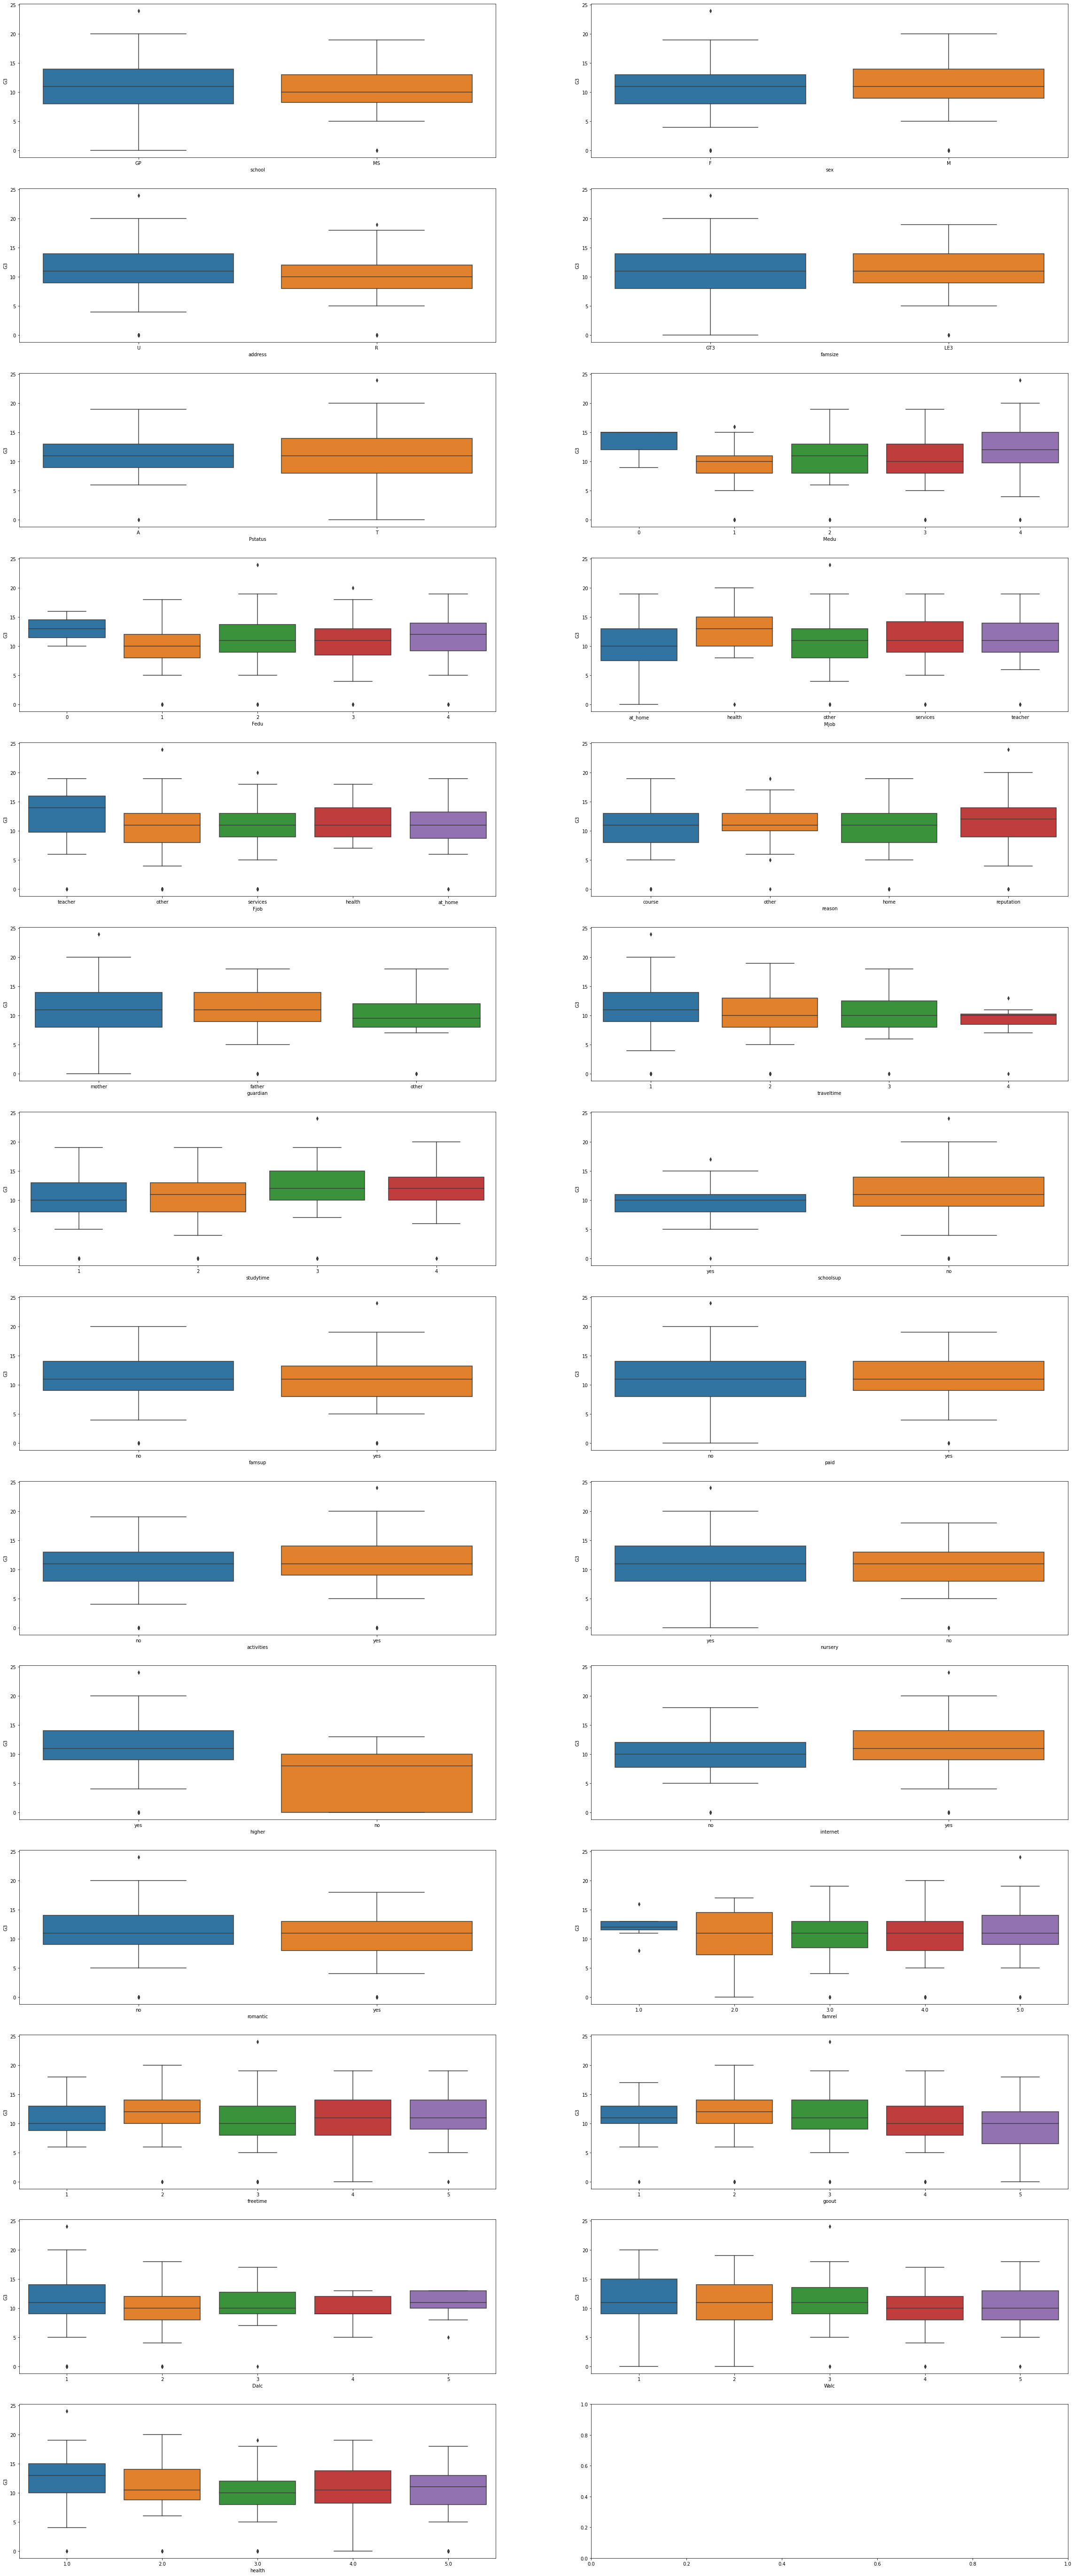

In [771]:
import seaborn
import matplotlib.pyplot as plt

fig, axes = plt.subplots(14, 2, figsize=(40, 100))
seaborn.boxplot(ax=axes[0, 0], data=data_imp, x='school',y='G3')
seaborn.boxplot(ax=axes[0, 1], data=data_imp, x='sex',y='G3') 
seaborn.boxplot(ax=axes[1, 0], data=data_imp, x='address',y='G3')
seaborn.boxplot(ax=axes[1, 1], data=data_imp, x='famsize',y='G3') 
seaborn.boxplot(ax=axes[2, 0], data=data_imp, x='Pstatus',y='G3')
seaborn.boxplot(ax=axes[2, 1], data=data_imp, x='Medu',y='G3')
seaborn.boxplot(ax=axes[3, 0], data=data_imp, x='Fedu',y='G3') 
seaborn.boxplot(ax=axes[3, 1], data=data_imp, x='Mjob',y='G3') 
seaborn.boxplot(ax=axes[4, 0], data=data_imp, x='Fjob',y='G3') 
seaborn.boxplot(ax=axes[4, 1], data=data_imp, x='reason',y='G3') 
seaborn.boxplot(ax=axes[5, 0], data=data_imp, x='guardian',y='G3') 
seaborn.boxplot(ax=axes[5, 1], data=data_imp, x='traveltime',y='G3') 
seaborn.boxplot(ax=axes[6, 0], data=data_imp, x='studytime',y='G3') 
seaborn.boxplot(ax=axes[6, 1], data=data_imp, x='schoolsup',y='G3') 
seaborn.boxplot(ax=axes[7, 0], data=data_imp, x='famsup',y='G3') 
seaborn.boxplot(ax=axes[7, 1], data=data_imp, x='paid',y='G3') 
seaborn.boxplot(ax=axes[8, 0], data=data_imp, x='activities',y='G3') 
seaborn.boxplot(ax=axes[8, 1], data=data_imp, x='nursery',y='G3') 
seaborn.boxplot(ax=axes[9, 0], data=data_imp, x='higher',y='G3') 
seaborn.boxplot(ax=axes[9, 1], data=data_imp, x='internet',y='G3') 
seaborn.boxplot(ax=axes[10, 0], data=data_imp, x='romantic',y='G3') 
seaborn.boxplot(ax=axes[10, 1], data=data_imp, x='famrel',y='G3') 
seaborn.boxplot(ax=axes[11, 0], data=data_imp, x='freetime',y='G3') 
seaborn.boxplot(ax=axes[11, 1], data=data_imp, x='goout',y='G3') 
seaborn.boxplot(ax=axes[12, 0], data=data_imp, x='Dalc',y='G3') 
seaborn.boxplot(ax=axes[12, 1], data=data_imp, x='Walc',y='G3') 
seaborn.boxplot(ax=axes[13, 0], data=data_imp, x='health',y='G3') 

Gráficamente, las variables que se podrían elegir para el modelo, por su diferencia en medias y comportamientos diferentes son:
* Medu
* Fedu
* Fjob
* reason
* traveltime
* studytime
* schoolsup
* higher
* famrel
* freetime
* goout
* Dalc
* health

Ahora se comparan medias por tratamiento:

1. School:

In [772]:
data_imp.groupby('school')['G3'].agg(['mean', 'std'])

,mean,std
school,,
GP,10.58,4.67
MS,10.14,4.13


Sus medias no parecen diferir significativamente.

2. Sex:

In [773]:
data_imp.groupby('sex')['G3'].agg(['mean', 'std'])

,mean,std
sex,,
F,10.19,4.65
M,10.91,4.55


Sus medias parecen diferir significativamente.

3. Address:

In [774]:
data_imp.groupby('address')['G3'].agg(['mean', 'std'])

,mean,std
address,,
R,9.56,4.62
U,10.81,4.58


Sus medias parecen diferir significativamente.

4. Famsize:

In [775]:
data_imp.groupby('famsize')['G3'].agg(['mean', 'std'])

,mean,std
famsize,,
GT3,10.28,4.79
LE3,11.11,4.13


Sus medias parecen diferir significativamente.

5. Pstatus:

In [776]:
data_imp.groupby('Pstatus')['G3'].agg(['mean', 'std'])

,mean,std
Pstatus,,
A,11.20,4.29
T,10.45,4.65


Sus medias parecen diferir significativamente.

6. Medu:

In [777]:
data_imp.groupby('Medu')['G3'].agg(['mean', 'std'])

,mean,std
Medu,,
0,13.00,3.46
1,8.83,4.25
2,9.89,4.57
3,10.28,4.68
4,11.89,4.43


Se observa una diferencia grande en los tratamientos.

7. Fedu:

In [778]:
data_imp.groupby('Fedu')['G3'].agg(['mean', 'std'])

,mean,std
Fedu,,
0,13.00,4.24
1,9.32,4.55
2,10.50,4.78
3,10.69,4.25
4,11.34,4.70


Se observa una diferencia grande en los tratamientos.

8. Mjob:

In [779]:
data_imp.groupby('Mjob')['G3'].agg(['mean', 'std'])

,mean,std
Mjob,,
at_home,9.11,4.86
health,12.25,4.34
other,10.05,4.44
services,11.10,4.68
teacher,11.05,4.40


Se observan cambios que pueden ser significativos en las medias.

9. Fjob:

In [780]:
data_imp.groupby('Fjob')['G3'].agg(['mean', 'std'])

,mean,std
Fjob,,
at_home,10.15,5.32
health,11.61,3.24
other,10.36,4.60
services,10.35,4.41
teacher,12.04,5.57


Se observan cambios que pueden ser significativos en las medias.

10. Reason:

In [781]:
data_imp.groupby('reason')['G3'].agg(['mean', 'std'])

,mean,std
reason,,
course,9.96,4.82
home,10.26,4.60
other,11.29,3.75
reputation,11.33,4.52


Se observan cambios que pueden ser significativos en las medias.

11. Guardian:

In [782]:
data_imp.groupby('guardian')['G3'].agg(['mean', 'std'])

,mean,std
guardian,,
father,10.80,4.44
mother,10.62,4.64
other,9.06,4.69


No se observan cambios significativos en las medias.

12. Traveltime:

In [783]:
data_imp.groupby('traveltime')['G3'].agg(['mean', 'std'])

,mean,std
traveltime,,
1,10.91,4.57
2,10.03,4.60
3,9.26,5.07
4,8.75,3.92


Se observan cambios que pueden ser significativos en las medias.

13. Studytime:

In [784]:
data_imp.groupby('studytime')['G3'].agg(['mean', 'std'])

,mean,std
studytime,,
1,10.07,5.04
2,10.27,4.15
3,11.62,4.95
4,11.56,4.93


No se observan cambios significativos en las medias.

14. Schoolsup:

In [785]:
data_imp.groupby('schoolsup')['G3'].agg(['mean', 'std'])

,mean,std
schoolsup,,
no,10.70,4.80
yes,9.42,2.89


Se observan cambios que pueden ser significativos en las medias.

15. Famsup:

In [786]:
data_imp.groupby('famsup')['G3'].agg(['mean', 'std'])

,mean,std
famsup,,
no,10.84,4.54
yes,10.33,4.66


No se observan cambios significativos en las medias.

16. Paid:

In [787]:
data_imp.groupby('paid')['G3'].agg(['mean', 'std'])

,mean,std
paid,,
no,10.11,5.20
yes,11.05,3.70


No se observan cambios significativos en las medias.

17. Activities:

In [788]:
data_imp.groupby('activities')['G3'].agg(['mean', 'std'])

,mean,std
activities,,
no,10.40,4.48
yes,10.66,4.75


No se observan cambios significativos en las medias.

18. Nursery:

In [789]:
data_imp.groupby('nursery')['G3'].agg(['mean', 'std'])

,mean,std
nursery,,
no,10.12,4.52
yes,10.63,4.64


No se observan cambios significativos en las medias.

19. Higher:

In [790]:
data_imp.groupby('higher')['G3'].agg(['mean', 'std'])

,mean,std
higher,,
no,6.80,4.83
yes,10.74,4.52


Se observan cambios probablemente significativos en las medias.

20. Internet:

In [791]:
data_imp.groupby('internet')['G3'].agg(['mean', 'std'])

,mean,std
internet,,
no,9.55,4.40
yes,10.73,4.64


No se observan cambios significativos en las medias.

21. Romantic:

In [792]:
data_imp.groupby('romantic')['G3'].agg(['mean', 'std'])

,mean,std
romantic,,
no,10.94,4.42
yes,9.69,4.89


No se observan cambios significativos en las medias.

22. Famrel:

In [793]:
data_imp.groupby('famrel')['G3'].agg(['mean', 'std'])

,mean,std
famrel,,
1.00,12.14,2.41
2.00,9.89,5.55
3.00,10.19,4.51
4.00,10.39,4.48
5.00,11.01,4.87


Se observan cambios que pueden ser significativos en las medias.

23. Freetime:

In [794]:
data_imp.groupby('freetime')['G3'].agg(['mean', 'std'])

,mean,std
freetime,,
1,11.06,3.55
2,11.59,4.25
3,9.87,4.96
4,10.56,4.32
5,11.14,4.72


Se podría pensar en algunos grupos que si existen diferencias significativas.

24. Goout:

In [795]:
data_imp.groupby('goout')['G3'].agg(['mean', 'std'])

,mean,std
goout,,
1,10.63,4.68
2,11.21,4.56
3,11.13,4.43
4,9.59,4.46
5,9.20,5.01


Se observan cambios que pueden ser significativos en las medias.

25. Dalc:

In [796]:
data_imp.groupby('Dalc')['G3'].agg(['mean', 'std'])

,mean,std
Dalc,,
1,10.91,4.70
2,9.23,4.88
3,10.50,3.44
4,9.89,2.62
5,10.67,2.69


No se observan cambios significativos en las medias.

26. Walc:

In [797]:
data_imp.groupby('Walc')['G3'].agg(['mean', 'std'])

,mean,std
Walc,,
1,10.97,4.99
2,10.02,5.04
3,10.93,4.07
4,9.69,3.62
5,10.14,4.13


No se observan cambios significativos en las medias.

27. Health:

In [798]:
data_imp.groupby('health')['G3'].agg(['mean', 'std'])

,mean,std
health,,
1.00,12.13,4.73
2.00,10.45,5.33
3.00,10.01,4.23
4.00,10.32,4.84
5.00,10.44,4.41


La media de la primera categoría parece diferir significativamente con las medias de los otros tratamientos.

Se podría pensar que las variables correctas para realizar el modelos según los cálculos anteriores son: 
* sex.
* address.
* famsize.
* Pstatus.
* Medu.
* Fedu.
* Mjob.
* Fjob.
* reason.
* traveltime.
* schoolsup.
* higher.
* famrel.
* freetime.
* goout.
* health.

Ahora se van a realizar las tablas ANOVA para verificar las suposiciones que se han hecho de las variables cualitativas:

1. School: 

In [799]:
from scipy import stats
stats.f_oneway(data_imp.G3[data_imp.school == 'GP'],data_imp.G3[data_imp.school == 'MS'])

F_onewayResult(statistic=0.328220732432849, pvalue=0.56705019778829)

Con un nivel de confianza del 95%, se concluye que no hay diferencias significativas en las medias.

2. Sex:

In [800]:
stats.f_oneway(data_imp.G3[data_imp.sex == 'F'],data_imp.G3[data_imp.sex == 'M'])

F_onewayResult(statistic=2.3083598132239227, pvalue=0.12951793898754216)

Con un nivel de confianza del 95%, se concluye que no hay diferencias significativas en las medias.

3. Address:

In [801]:
stats.f_oneway(data_imp.G3[data_imp.address == 'U'],data_imp.G3[data_imp.address == 'R'])

F_onewayResult(statistic=4.824328306959258, pvalue=0.028669089434270642)

Con un nivel de confianza del 95%, se concluye que hay diferencias significativas en las medias.

4. Famsize:

In [802]:
stats.f_oneway(data_imp.G3[data_imp.famsize == 'LE3'],data_imp.G3[data_imp.famsize == 'GT3'])

F_onewayResult(statistic=2.518865527164512, pvalue=0.11332981516126583)

Con un nivel de confianza del 95%, se concluye que no hay diferencias significativas en las medias.

5. Pstatus:

In [803]:
stats.f_oneway(data_imp.G3[data_imp.Pstatus == 'T'],data_imp.G3[data_imp.Pstatus == 'A'])

F_onewayResult(statistic=0.9624124950021439, pvalue=0.327208928327129)

Con un nivel de confianza del 95%, se concluye que no hay diferencias significativas en las medias.

6. Medu:

In [804]:
stats.f_oneway(data_imp.G3[data_imp.Medu == 0],data_imp.G3[data_imp.Medu == 1],data_imp.G3[data_imp.Medu == 2],data_imp.G3[data_imp.Medu == 3],data_imp.G3[data_imp.Medu == 4])

F_onewayResult(statistic=5.769717472590899, pvalue=0.00016271854373831366)

Con un nivel de confianza del 95%, se concluye que hay diferencias significativas en las medias.

7. Fedu:

In [805]:
stats.f_oneway(data_imp.G3[data_imp.Fedu == 0],data_imp.G3[data_imp.Fedu == 1],data_imp.G3[data_imp.Fedu == 2],data_imp.G3[data_imp.Fedu == 3],data_imp.G3[data_imp.Fedu == 4])

F_onewayResult(statistic=2.271107674133018, pvalue=0.061105106748893835)

Con un nivel de confianza del 95%, se concluye que no hay diferencias significativas en las medias.

8. Mjob:

In [806]:
stats.f_oneway(data_imp.G3[data_imp.Mjob == 'teacher'],data_imp.G3[data_imp.Mjob == 'health'],data_imp.G3[data_imp.Mjob == 'services'],data_imp.G3[data_imp.Mjob == 'at_home'],data_imp.G3[data_imp.Mjob == 'other'])

F_onewayResult(statistic=3.4553976800398436, pvalue=0.008655509153684276)

Con un nivel de confianza del 95%, se concluye que hay diferencias significativas en las medias.

9. Fjob:

In [807]:
stats.f_oneway(data_imp.G3[data_imp.Fjob == 'teacher'],data_imp.G3[data_imp.Fjob == 'health'],data_imp.G3[data_imp.Fjob == 'services'],data_imp.G3[data_imp.Fjob == 'at_home'],data_imp.G3[data_imp.Fjob == 'other'])

F_onewayResult(statistic=1.14185709674191, pvalue=0.3364408310255707)

Con un nivel de confianza del 95%, se concluye que no hay diferencias significativas en las medias.

10. Reason:

In [808]:
stats.f_oneway(data_imp.G3[data_imp.reason == 'home'],data_imp.G3[data_imp.reason == 'reputation'],data_imp.G3[data_imp.reason == 'course'],data_imp.G3[data_imp.reason == 'other'])

F_onewayResult(statistic=2.156484266511459, pvalue=0.09275681974888801)

Con un nivel de confianza del 95%, se concluye que no hay diferencias significativas en las medias.

11. Guardian:

In [809]:
stats.f_oneway(data_imp.G3[data_imp.guardian == 'mother'],data_imp.G3[data_imp.guardian == 'father'],data_imp.G3[data_imp.guardian == 'other'])

F_onewayResult(statistic=1.818475977134318, pvalue=0.16369710894297848)

Con un nivel de confianza del 95%, se concluye que no hay diferencias significativas en las medias.

12. traveltime:

In [810]:
stats.f_oneway(data_imp.G3[data_imp.traveltime == 1],data_imp.G3[data_imp.traveltime == 2],data_imp.G3[data_imp.traveltime == 3],data_imp.G3[data_imp.traveltime == 4])

F_onewayResult(statistic=1.950718564569303, pvalue=0.12098261271112962)

Con un nivel de confianza del 95%, se concluye que no hay diferencias significativas en las medias.

13. studytime:

In [811]:
stats.f_oneway(data_imp.G3[data_imp.studytime == 1],data_imp.G3[data_imp.studytime == 2],data_imp.G3[data_imp.studytime == 3],data_imp.G3[data_imp.studytime == 4])

F_onewayResult(statistic=2.1366123772834635, pvalue=0.09517788698784325)

Con un nivel de confianza del 95%, se concluye que no hay diferencias significativas en las medias.

14. schoolsup:

In [812]:
stats.f_oneway(data_imp.G3[data_imp.schoolsup == 'yes'],data_imp.G3[data_imp.schoolsup == 'no'])

F_onewayResult(statistic=3.3423115170190703, pvalue=0.06830975809453677)

Con un nivel de confianza del 95%, se concluye que no hay diferencias significativas en las medias.

15. famsup:

In [813]:
stats.f_oneway(data_imp.G3[data_imp.famsup == 'yes'],data_imp.G3[data_imp.famsup == 'no'])

F_onewayResult(statistic=1.126240999330904, pvalue=0.28925793568149727)

Con un nivel de confianza del 95%, se concluye que no hay diferencias significativas en las medias.

16. paid:

In [814]:
stats.f_oneway(data_imp.G3[data_imp.paid == 'yes'],data_imp.G3[data_imp.paid == 'no'])

F_onewayResult(statistic=3.900519237819399, pvalue=0.04900035892066553)

Con un nivel de confianza del 95%, se concluye que hay diferencias significativas en las medias.

17. activities:

In [815]:
stats.f_oneway(data_imp.G3[data_imp.activities == 'yes'],data_imp.G3[data_imp.activities == 'no'])

F_onewayResult(statistic=0.3029627903764226, pvalue=0.5823569312381417)

Con un nivel de confianza del 95%, se concluye que no hay diferencias significativas en las medias.

18. nursery:

In [816]:
stats.f_oneway(data_imp.G3[data_imp.nursery == 'yes'],data_imp.G3[data_imp.nursery == 'no'])

F_onewayResult(statistic=0.7660605861475666, pvalue=0.38199577901274817)

Con un nivel de confianza del 95%, se concluye que no hay diferencias significativas en las medias.

19. higher:

In [817]:
stats.f_oneway(data_imp.G3[data_imp.higher == 'yes'],data_imp.G3[data_imp.higher == 'no'])

F_onewayResult(statistic=14.274141433950092, pvalue=0.00018358662730781793)

Con un nivel de confianza del 95%, se concluye que hay diferencias significativas en las medias.

20. internet:

In [818]:
stats.f_oneway(data_imp.G3[data_imp.internet == 'yes'],data_imp.G3[data_imp.internet == 'no'])

F_onewayResult(statistic=3.5048300933622314, pvalue=0.06196409218311263)

Con un nivel de confianza del 95%, se concluye que no hay diferencias significativas en las medias.

21. romantic:

In [819]:
stats.f_oneway(data_imp.G3[data_imp.romantic == 'yes'],data_imp.G3[data_imp.romantic == 'no'])

F_onewayResult(statistic=6.305702068492602, pvalue=0.012452530102573042)

Con un nivel de confianza del 95%, se concluye que hay diferencias significativas en las medias.

22. famrel:

In [820]:
stats.f_oneway(data_imp.G3[data_imp.famrel == 1],data_imp.G3[data_imp.famrel == 2],data_imp.G3[data_imp.famrel == 3],data_imp.G3[data_imp.famrel == 4],data_imp.G3[data_imp.famrel == 5])

F_onewayResult(statistic=0.7010667796926541, pvalue=0.5916149613098887)

Con un nivel de confianza del 95%, se concluye que no hay diferencias significativas en las medias.

23. freetime:

In [821]:
stats.f_oneway(data_imp.G3[data_imp.freetime == 1],data_imp.G3[data_imp.freetime == 2],data_imp.G3[data_imp.freetime == 3],data_imp.G3[data_imp.freetime == 4],data_imp.G3[data_imp.freetime == 5])

F_onewayResult(statistic=1.845418381207533, pvalue=0.11947824857536557)

Con un nivel de confianza del 95%, se concluye que no hay diferencias significativas en las medias.

24. goout:

In [822]:
stats.f_oneway(data_imp.G3[data_imp.goout == 1],data_imp.G3[data_imp.goout == 2],data_imp.G3[data_imp.goout == 3],data_imp.G3[data_imp.goout == 4],data_imp.G3[data_imp.goout == 5])

F_onewayResult(statistic=3.0655542887369456, pvalue=0.016639925750268916)

Con un nivel de confianza del 95%, se concluye que hay diferencias significativas en las medias.

25. Dalc:

In [823]:
stats.f_oneway(data_imp.G3[data_imp.Dalc == 1],data_imp.G3[data_imp.Dalc == 2],data_imp.G3[data_imp.Dalc == 3],data_imp.G3[data_imp.Dalc == 4],data_imp.G3[data_imp.Dalc == 5])

F_onewayResult(statistic=1.9490769945015747, pvalue=0.10171238243164302)

Con un nivel de confianza del 95%, se concluye que no hay diferencias significativas en las medias.

26. Walc:

In [824]:
stats.f_oneway(data_imp.G3[data_imp.Walc == 1],data_imp.G3[data_imp.Walc == 2],data_imp.G3[data_imp.Walc == 3],data_imp.G3[data_imp.Walc == 4],data_imp.G3[data_imp.Walc == 5])

F_onewayResult(statistic=1.1956255296180562, pvalue=0.3122862570812063)

Con un nivel de confianza del 95%, se concluye que no hay diferencias significativas en las medias.

27. health:

In [825]:
stats.f_oneway(data_imp.G3[data_imp.health == 1],data_imp.G3[data_imp.health == 2],data_imp.G3[data_imp.health == 3],data_imp.G3[data_imp.health == 4],data_imp.G3[data_imp.health == 5])

F_onewayResult(statistic=1.7258461071183946, pvalue=0.14354730155156706)

Con un nivel de confianza del 95%, se concluye que no hay diferencias significativas en las medias.

### CONCLUSIONES FINALES:
Teniendo en cuenta el análisis descriptivo de las variables cualitativas, se llega a la conclusión que se van a utilizar para el modelo:
* address
* Medu
* Mjob
* higher
* goout
<BR> Los criterios para esta elección fueron los resultados de las pruebas visuales, así como el p-valor de las comparaciones por tratamiento.

# PUNTO 3
### Seleccione un algoritmo 

Para este caso, la variable respuesta se va a categorizar de la siguiente manera:
* Notas menores a 12: Reprobado (0)
* Notas mayores o iguales a 12: Aprobado (1)

In [826]:
data_imp.loc[:,'G3_dummy']=data_imp.loc[:,'G3'].map(lambda x: 1 if x >= 12 else 0)

In [827]:
data_f = data_imp[['address','Medu','Mjob','higher','goout','G3_dummy']]
data_f

,address,Medu,Mjob,higher,goout,G3_dummy
0,U,4,at_home,yes,4,0
1,U,1,at_home,yes,3,0
2,U,1,at_home,yes,2,0
3,U,4,health,yes,2,1
4,U,3,other,yes,2,0
...,...,...,...,...,...,...
390,U,2,services,yes,4,0
391,U,3,services,yes,5,1
392,R,1,other,yes,3,0
393,R,3,services,yes,1,0


1. Regresión logística:

* BASE DE DATOS COMPLETA

1. Con solver = liblinear y C = 1e9

In [828]:
from sklearn.linear_model import LogisticRegression
modelo_log = LogisticRegression(solver='liblinear',C=1e9)

address_dummy = pd.get_dummies(data_f['address'],drop_first=True)
Medu_dummy = pd.get_dummies(data_f['Medu'],drop_first=True)
mjob_dummy = pd.get_dummies(data_f['Mjob'],drop_first=True)
higher_dummy = pd.get_dummies(data_f['higher'],drop_first=True)
Goout_dummy = pd.get_dummies(data_f['goout'],drop_first=True)

X=pd.concat([address_dummy,Medu_dummy,mjob_dummy,higher_dummy,Goout_dummy],axis=1)
y = data_f.G3_dummy
modelo_log.fit(X, y)
data_f['G3_pred'] = modelo_log.predict(X)
print("Intercept:", modelo_log.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo_log.coef_.flatten(), )))

Intercept: [-0.70442718]
Coeficiente: [('U', 0.36415845508851524), (1, -1.6231102090745708), (2, -0.9673266776134171), (3, -0.9810655675281164), (4, -0.07465635647776601), ('health', 0.47919679120610453), ('other', -0.035421827772878396), ('services', 0.17579387620498413), ('teacher', -0.7929142531390703), ('yes', 0.7460352985908247), (2, 0.6598487951460392), (3, 0.3645338706244873), (4, -0.3221647646812432), (5, -0.42916393993275426)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


2. Con solver = liblinear y C = 100

In [829]:
modelo_log = LogisticRegression(solver='liblinear',C=100)

address_dummy = pd.get_dummies(data_f['address'],drop_first=True)
Medu_dummy = pd.get_dummies(data_f['Medu'],drop_first=True)
mjob_dummy = pd.get_dummies(data_f['Mjob'],drop_first=True)
higher_dummy = pd.get_dummies(data_f['higher'],drop_first=True)
Goout_dummy = pd.get_dummies(data_f['goout'],drop_first=True)

X=pd.concat([address_dummy,Medu_dummy,mjob_dummy,higher_dummy,Goout_dummy],axis=1)
y = data_f.G3_dummy
modelo_log.fit(X, y)
data_f['G3_pred'] = modelo_log.predict(X)
print("Intercept:", modelo_log.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo_log.coef_.flatten(), )))

Intercept: [-0.73884785]
Coeficiente: [('U', 0.3642633781290758), (1, -1.5773064775804315), (2, -0.9222099127145091), (3, -0.935549021139145), (4, -0.029570109829976078), ('health', 0.477268886288372), ('other', -0.03674831169615117), ('services', 0.17397295899701468), ('teacher', -0.7936391412017673), ('yes', 0.7379572087574885), (2, 0.6584035864649491), (3, 0.36288048238528625), (4, -0.3236758307726191), (5, -0.4308139746654622)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


3. Con solver = liblinear y C = 200

In [830]:
modelo_log = LogisticRegression(solver='liblinear',C=200)

address_dummy = pd.get_dummies(data_f['address'],drop_first=True)
Medu_dummy = pd.get_dummies(data_f['Medu'],drop_first=True)
mjob_dummy = pd.get_dummies(data_f['Mjob'],drop_first=True)
higher_dummy = pd.get_dummies(data_f['higher'],drop_first=True)
Goout_dummy = pd.get_dummies(data_f['goout'],drop_first=True)

X=pd.concat([address_dummy,Medu_dummy,mjob_dummy,higher_dummy,Goout_dummy],axis=1)
y = data_f.G3_dummy
modelo_log.fit(X, y)
data_f['G3_pred'] = modelo_log.predict(X)
print("Intercept:", modelo_log.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo_log.coef_.flatten(), )))

Intercept: [-0.72251809]
Coeficiente: [('U', 0.36422399171873593), (1, -1.599288612400779), (2, -0.9438626721325819), (3, -0.9573858891806393), (4, -0.051192491597264994), ('health', 0.4781885264340525), ('other', -0.036115301156106415), ('services', 0.1748474297286115), ('teacher', -0.7933193725260995), ('yes', 0.7419527358541019), (2, 0.6591629815440873), (3, 0.36374640963537164), (4, -0.32289217641533385), (5, -0.42996852845708755)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


4. Con solver = saga y C=1e9

In [831]:
modelo_log = LogisticRegression(solver='saga',C=1e9)

address_dummy = pd.get_dummies(data_f['address'],drop_first=True)
Medu_dummy = pd.get_dummies(data_f['Medu'],drop_first=True)
mjob_dummy = pd.get_dummies(data_f['Mjob'],drop_first=True)
higher_dummy = pd.get_dummies(data_f['higher'],drop_first=True)
Goout_dummy = pd.get_dummies(data_f['goout'],drop_first=True)

X=pd.concat([address_dummy,Medu_dummy,mjob_dummy,higher_dummy,Goout_dummy],axis=1)
y = data_f.G3_dummy
modelo_log.fit(X, y)
data_f['G3_pred'] = modelo_log.predict(X)
print("Intercept:", modelo_log.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo_log.coef_.flatten(), )))

Intercept: [-0.71491259]
Coeficiente: [('U', 0.3643827054842302), (1, -1.612650530672297), (2, -0.9567893956363606), (3, -0.9704874531464625), (4, -0.06396757111253808), ('health', 0.4787011879012394), ('other', -0.03575770986784246), ('services', 0.1754067857923049), ('teacher', -0.7934549976746456), ('yes', 0.7456596188752611), (2, 0.6604972918218115), (3, 0.36501358959292335), (4, -0.3217488242061005), (5, -0.42873393809695354)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

5. Con solver = saga y C=100

In [832]:
modelo_log = LogisticRegression(solver='saga',C=100)

address_dummy = pd.get_dummies(data_f['address'],drop_first=True)
Medu_dummy = pd.get_dummies(data_f['Medu'],drop_first=True)
mjob_dummy = pd.get_dummies(data_f['Mjob'],drop_first=True)
higher_dummy = pd.get_dummies(data_f['higher'],drop_first=True)
Goout_dummy = pd.get_dummies(data_f['goout'],drop_first=True)

X=pd.concat([address_dummy,Medu_dummy,mjob_dummy,higher_dummy,Goout_dummy],axis=1)
y = data_f.G3_dummy
modelo_log.fit(X, y)
data_f['G3_pred'] = modelo_log.predict(X)
print("Intercept:", modelo_log.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo_log.coef_.flatten(), )))

Intercept: [-0.75755006]
Coeficiente: [('U', 0.3648921994174962), (1, -1.5622259021824223), (2, -0.9070457308516225), (3, -0.9204632448971576), (4, -0.014414709926739187), ('health', 0.47693078723710514), ('other', -0.03685402863361662), ('services', 0.1738999779631417), ('teacher', -0.7938886912364538), ('yes', 0.7393314706338239), (2, 0.660622490582478), (3, 0.3648151566492074), (4, -0.32186643228691025), (5, -0.42887929184466933)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

6. Con solver = saga y C=200

In [833]:
modelo_log = LogisticRegression(solver='saga',C=200)

address_dummy = pd.get_dummies(data_f['address'],drop_first=True)
Medu_dummy = pd.get_dummies(data_f['Medu'],drop_first=True)
mjob_dummy = pd.get_dummies(data_f['Mjob'],drop_first=True)
higher_dummy = pd.get_dummies(data_f['higher'],drop_first=True)
Goout_dummy = pd.get_dummies(data_f['goout'],drop_first=True)

X=pd.concat([address_dummy,Medu_dummy,mjob_dummy,higher_dummy,Goout_dummy],axis=1)
y = data_f.G3_dummy
modelo_log.fit(X, y)
data_f['G3_pred'] = modelo_log.predict(X)
print("Intercept:", modelo_log.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo_log.coef_.flatten(), )))

Intercept: [-0.73856294]
Coeficiente: [('U', 0.36468509437844815), (1, -1.58501295417623), (2, -0.9294937178410487), (3, -0.9430281080211736), (4, -0.036717657713474294), ('health', 0.4776882915724431), ('other', -0.03638802093229361), ('services', 0.17456278773719403), ('teacher', -0.7937825396777636), ('yes', 0.7423805206365273), (2, 0.6606766594106828), (3, 0.36499215161983484), (4, -0.3217320688868121), (5, -0.4287397994923616)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

7. Con solver = lbfgs y C=1e9

In [834]:
modelo_log = LogisticRegression(solver='lbfgs',C=1e9)

address_dummy = pd.get_dummies(data_f['address'],drop_first=True)
Medu_dummy = pd.get_dummies(data_f['Medu'],drop_first=True)
mjob_dummy = pd.get_dummies(data_f['Mjob'],drop_first=True)
higher_dummy = pd.get_dummies(data_f['higher'],drop_first=True)
Goout_dummy = pd.get_dummies(data_f['goout'],drop_first=True)

X=pd.concat([address_dummy,Medu_dummy,mjob_dummy,higher_dummy,Goout_dummy],axis=1)
y = data_f.G3_dummy
modelo_log.fit(X, y)
data_f['G3_pred'] = modelo_log.predict(X)
print("Intercept:", modelo_log.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo_log.coef_.flatten(), )))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Intercept: [-0.70360469]
Coeficiente: [('U', 0.36407762115016234), (1, -1.62398566192736), (2, -0.9681884546613021), (3, -0.9819441539367129), (4, -0.0754931579981288), ('health', 0.47933529351128645), ('other', -0.035287790781274746), ('services', 0.1760440699354392), ('teacher', -0.7928492242854617), ('yes', 0.7454155059631902), (2, 0.6604452329563154), (3, 0.3651920336024752), (4, -0.3215037475617925), (5, -0.4285628436695503)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


8. Con solver = lbfgs y C=100

In [835]:
modelo_log = LogisticRegression(solver='lbfgs',C=100)

address_dummy = pd.get_dummies(data_f['address'],drop_first=True)
Medu_dummy = pd.get_dummies(data_f['Medu'],drop_first=True)
mjob_dummy = pd.get_dummies(data_f['Mjob'],drop_first=True)
higher_dummy = pd.get_dummies(data_f['higher'],drop_first=True)
Goout_dummy = pd.get_dummies(data_f['goout'],drop_first=True)

X=pd.concat([address_dummy,Medu_dummy,mjob_dummy,higher_dummy,Goout_dummy],axis=1)
y = data_f.G3_dummy
modelo_log.fit(X, y)
data_f['G3_pred'] = modelo_log.predict(X)
print("Intercept:", modelo_log.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo_log.coef_.flatten(), )))

Intercept: [-0.75230088]
Coeficiente: [('U', 0.3646927936721243), (1, -1.567487287776998), (2, -0.9124141431568042), (3, -0.9259063743797827), (4, -0.01991671326791897), ('health', 0.47754257320989757), ('other', -0.03642003864910599), ('services', 0.1743887941457499), ('teacher', -0.7933798731747943), ('yes', 0.7390954049406888), (2, 0.6607305669847722), (3, 0.365037448672755), (4, -0.3216107159522532), (5, -0.428656011643715)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


9. Con solver = lbfgs y C=200

In [836]:
modelo_log = LogisticRegression(solver='lbfgs',C=200)

address_dummy = pd.get_dummies(data_f['address'],drop_first=True)
Medu_dummy = pd.get_dummies(data_f['Medu'],drop_first=True)
mjob_dummy = pd.get_dummies(data_f['Mjob'],drop_first=True)
higher_dummy = pd.get_dummies(data_f['higher'],drop_first=True)
Goout_dummy = pd.get_dummies(data_f['goout'],drop_first=True)

X=pd.concat([address_dummy,Medu_dummy,mjob_dummy,higher_dummy,Goout_dummy],axis=1)
y = data_f.G3_dummy
modelo_log.fit(X, y)
data_f['G3_pred'] = modelo_log.predict(X)
print("Intercept:", modelo_log.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo_log.coef_.flatten(), )))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Intercept: [-0.72872975]
Coeficiente: [('U', 0.3643991546521011), (1, -1.5948690505013798), (2, -0.9393986699341591), (3, -0.9530073124392304), (4, -0.046833525034689225), ('health', 0.4783865440764935), ('other', -0.03592339349999122), ('services', 0.17519206974118046), ('teacher', -0.7931737818205217), ('yes', 0.7421846231717175), (2, 0.6606513228871431), (3, 0.36515873764752665), (4, -0.3215383989178291), (5, -0.42856303737687906)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


* PARTICIÓN DE ENTRENAMIENTO

In [837]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score

1. Con solver = liblinear y C=1e9

In [838]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
modelo_log = LogisticRegression(solver='liblinear',C=1e9)
modelo_log.fit(X_train, y_train)
est1 = modelo_log.predict(X_test)
ex1 = metrics.accuracy_score(y_test, est1)
loss1 = metrics.log_loss(y_test, est1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


2. Con solver = liblinear y C=100

In [839]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
modelo_log = LogisticRegression(solver='liblinear',C=100)
modelo_log.fit(X_train, y_train)
est2 = modelo_log.predict(X_test)
ex2 = metrics.accuracy_score(y_test, est2)
loss2 = metrics.log_loss(y_test, est2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


3. Con solver = liblinear y C=200

In [840]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
modelo_log = LogisticRegression(solver='liblinear',C=200)
modelo_log.fit(X_train, y_train)
est3 = modelo_log.predict(X_test)
ex3 = metrics.accuracy_score(y_test, est3)
loss3 = metrics.log_loss(y_test, est3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


4. Con solver = saga y C=1e9

In [841]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
modelo_log = LogisticRegression(solver='saga',C=1e9)
modelo_log.fit(X_train, y_train)
est4 = modelo_log.predict(X_test)
ex4 = metrics.accuracy_score(y_test, est4)
loss4 = metrics.log_loss(y_test, est4)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


5. Con solver = saga y C=100

In [842]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
modelo_log = LogisticRegression(solver='saga',C=100)
modelo_log.fit(X_train, y_train)
est5 = modelo_log.predict(X_test)
ex5 = metrics.accuracy_score(y_test, est5)
loss5 = metrics.log_loss(y_test, est5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


6. Con solver = saga y C=200

In [843]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)
modelo_log = LogisticRegression(solver='saga',C=200)
modelo_log.fit(X_train, y_train)
est6 = modelo_log.predict(X_test)
ex6 = metrics.accuracy_score(y_test, est6)
loss6 = metrics.log_loss(y_test, est6)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


7. Con solver = lbfgs y C=1e9

In [844]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
modelo_log = LogisticRegression(solver='lbfgs',C=1e9)
modelo_log.fit(X_train, y_train)
est7 = modelo_log.predict(X_test)
ex7 = metrics.accuracy_score(y_test, est7)
loss7 = metrics.log_loss(y_test, est7)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


8. Con solver = lbfgs y C=100

In [845]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
modelo_log = LogisticRegression(solver='lbfgs',C=100)
modelo_log.fit(X_train, y_train)
est8 = modelo_log.predict(X_test)
ex8 = metrics.accuracy_score(y_test, est8)
loss8 = metrics.log_loss(y_test, est8)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


9. Con solver = lbfgs y C=200

In [846]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
modelo_log = LogisticRegression(solver='lbfgs',C=200)
modelo_log.fit(X_train, y_train)
est9 = modelo_log.predict(X_test)
ex9 = metrics.accuracy_score(y_test, est9)
loss9 = metrics.log_loss(y_test, est9)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


* Métricas:

In [847]:
metricas = pd.DataFrame({'Modelo' : ['Modelo 1','Modelo 2','Modelo 3','Modelo 4','Modelo 5','Modelo 6','Modelo 7','Modelo 8','Modelo 9']})
metricas['Exactitud'] = (ex1,ex2,ex3,ex4,ex5,ex6,ex7,ex8,ex9)
metricas['Log loss'] = (loss1,loss2,loss3,loss4,loss5,loss6,loss7,loss8,loss9)
metricas

,Modelo,Exactitud,Log loss
0,Modelo 1,0.59,14.09
1,Modelo 2,0.64,12.27
2,Modelo 3,0.62,13.18
3,Modelo 4,0.62,13.18
4,Modelo 5,0.58,14.54
5,Modelo 6,0.55,15.45
6,Modelo 7,0.67,11.36
7,Modelo 8,0.61,13.63
8,Modelo 9,0.59,14.09


# PUNTO 4
### Análisis

1. ¿Cuál fue el mejor modelo según las métricas anteriormente mencionadas? <BR>
Teniendo en cuenta la exactitud y el log loss se concluye que el mejor modelo es el 7, que fue realizado con el solucionador lbfgs (Apto para este tipo de bases con problemas binarios y multiclase) y C=1e9 (Representa el inverso de la fuerza de regularización del modelo,entre mayor sea el valor, menos regularizado va a estar). <BR>
Esta conclusión se obtuvo mediante la lectura del las métricas de la siguiente manera: 
* La mayor exactitud la obtuvo el modelo 7 con un valor de 0.67, lo que quiere decir que 67 predicciones estuvieron correctas por cada 100 casos realizados.
* La métrica log loss es muy buena para el caso que se presenta, puesto que, la respuesta es un clasificador binario. Además, el modelo 7 obtuvo la pérdida logarítmica más baja con un valor de 11.36, lo que implica mejores predicciones.  

2. De la respuesta anterior ¿Qué valores de los parámetros se seleccionaron para lograr dicho resultado? <BR>
El modelo pronosticado se realizó usando variables sólo categóricas, por lo que fue necesario transformar estas variables a dummy. Para evitar multicolinealidad con las variables dummy, a la hora de su creación se eliminó la categoría de referencia con la que se realizaron el resto de dummies. Por tanto, los parámetros del modelo representan cada categoría de cada variable que se utilizó para la construcción del modelo, sin incluir las bases. 

3. Analice los coeficientes del modelo final seleccionado <BR>
El modelo seleccionado fue:

In [848]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
modelo_log = LogisticRegression(solver='lbfgs',C=1e9)
modelo_log.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression(C=1000000000.0)

In [849]:
print("Intercepto:", modelo_log.intercept_)

Intercepto: [-1.14558068]


In [858]:
coef = pd.DataFrame({'Variable' : ['U','Medu_1','Medu_2','Medu_3','Medu_4','M_job_health','M_job_other','M_job_services','M_job_teacher','higher_yes','goout_2','goout_3','goout_4','goout_5']})

In [861]:
 coef['Coeficiente'] = modelo_log.coef_.flatten()
 coef

,Variable,Coef,Coeficiente
0,U,0.44,0.44
1,Medu_1,-1.95,-1.95
2,Medu_2,-1.30,-1.30
3,Medu_3,-1.28,-1.28
4,Medu_4,-0.50,-0.50
5,M_job_health,0.41,0.41
6,M_job_other,-0.03,-0.03
7,M_job_services,0.43,0.43
8,M_job_teacher,-0.45,-0.45
9,higher_yes,1.31,1.31


* Para la variable address, el coeficiente para zona urbana es de 0.44, lo que quiere decir que en dado caso que el estudiante viva en zona urbana, esto aumenta el valor de G3 en 0.44 unidades en comparación a si el estudiante viviera en zona rural.
* Para la variable Medu, el coeficiente para Medu_1 es de -1.95, lo que quiere decir que en dado caso que el estudiante tuviera una mamá que estudió solo hasta cuarto de primaria, esto disminuiría el valor de G3 en 1.65 unidades en comparación a las demás categorías. Si la mamá alcanzó un nivel educativo entre 5to y 9no grado, esto disminuiría el valor de G3 en 1.30 en comparación a las demás categorías. Si la mamá alcanzó un nivel educativo de secundaria, esto disminuiría el valor de G3 en 1.28 en comparación a las demás categorías. Y por último, si la mamá alcanzó un nivel educativo de educación superior, esto disminuiría el valor de G3 en 0.50 en comparación a las demás categorías.
* Para la variable M_job, se tiene que si la mamá del estudiante trabaja en el sector salud, esto aumentaría el valor de G3 en 0.41 unidades en comparación a las otras categorías; si trabaja como profesora, esto disminuiría el valor de G3 en 0.45 unidades en comparación a las otras categorías; si trabaja en servicios civiles, esto aumentaría el valor de G3 en 0.43 unidades en comparación a las otras categorías y, para finalizar, si la mamá del estudiante trabajara en otra área esto disminuiría el valor de G3 en 0.03 unidades en comparación a las otras categorías.
* Si el estudiante quiere recibir educación superior esto aumenta el resultado de G3 en 1.31 unidades, en comparación a si no quisiera recibir educación superior.
* Si el estudiante considera que casi no sale con sus amigos, esto aumenta el resultado de G3 en 0.70 unidades en comparación a las demás categorías; si considera que sale lo normal esto aumenta el valor de G3 en 0.33 unidades en comparación a las demás categorías; si considera que sale varias veces con sus amigos esto disminuye el valor de G3 en 0.39 unidades en comparación a las demás categorías, y si considera que sale mucho con sus amigos esto aumenta el resultado de G3 en 0.04 unidades en comparación a las demás categorías.